DATA PREPROCESSING


In [17]:
import numpy as np
import pandas as pd

df=pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.describe()


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: xlabel='Drug', ylabel='count'>

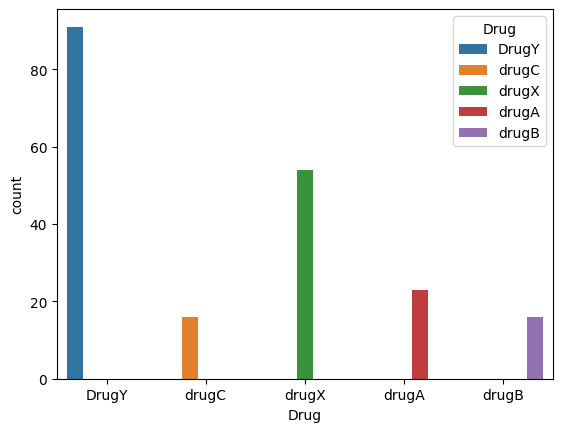

In [18]:
import seaborn as sns
sns.countplot(x='Drug',data=df,hue='Drug')

<Axes: xlabel='Sex', ylabel='count'>

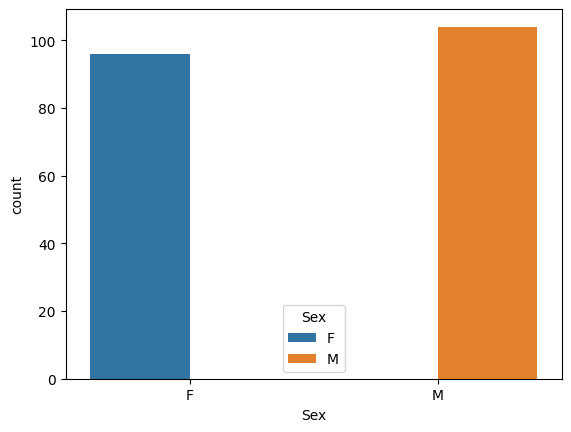

In [8]:
sns.countplot(x='Sex',data=df,hue='Sex')

<Axes: xlabel='Na_to_K', ylabel='Count'>

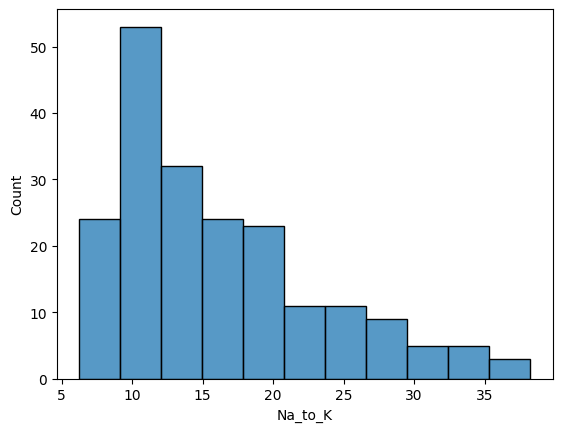

In [9]:
sns.histplot(x='Na_to_K', data=df)

In [19]:
X=df.drop(columns=['Drug'],axis=1)
Y=df['Drug']

In [20]:
#label and one hot encoding of categorical columns

X=pd.get_dummies(X,prefix=['Sex','BP','Cholesterol'],columns=['Sex','BP','Cholesterol'],drop_first=True)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

le= LabelEncoder()
Y=le.fit_transform(Y)

In [21]:
#splitting data for training and testing

X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size=0.3,random_state=2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [23]:
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [24]:
op=len(np.unique(Y))
op

5

In [25]:
model=Sequential()
model.add(Dense(48,activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
output_layer = Dense(op,activation='softmax')
model.add(output_layer)

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
#test the model
model.fit(X_train,Y_train,epochs=50,batch_size=4)

Epoch 1/50
35/35 [==============================] - 2s 3ms/step - loss: 1.5883 - accuracy: 0.0929
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 1.4696 - accuracy: 0.1429
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 1.3414 - accuracy: 0.4000
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 1.1701 - accuracy: 0.4786
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 0.9312 - accuracy: 0.6714
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.8000
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.8929
Epoch 8/50
35/35 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.9571
Epoch 9/50
35/35 [==============================] - 0s 3ms/step - loss: 0.2187 - accuracy: 0.9643
Epoch 10/50
35/35 [==============================] - 0s 3ms/step - loss: 0.1568 - accuracy: 0.9643
Epoch 11/50
35/35 [

In [30]:
#evaluate the model

test_loss, test_acc = model.evaluate(X_test, Y_test)
print("test accuracy= ",test_acc*100)

2/2 [==============================] - 0s 18ms/step - loss: 0.4127 - accuracy: 0.8833
test accuracy=  88.33333253860474


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                336       
                                                                 
 dense_1 (Dense)             (None, 36)                1764      
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


In [43]:
#creating random data
Age = np.random.randint(18, 60,)
Sex = np.random.choice(['M', 'F'])
BP = np.random.choice(['HIGH','LOW'])
Cholesterol= np.random.choice(['HIGH'])
Na_to_K=np.random.randint(5, 30)

In [48]:
#test with random data

X_test = pd.DataFrame({
    'Age': Age,
    'Sex': Sex,
    'BP': BP,
    'Cholesterol': Cholesterol,
    'Na_to_K': Na_to_K})

X_test_encoded=pd.get_dummies(X_test,columns=['Age','Sex','BP','Cholesterol','Na_to_K'])
X_test_scaled=sc.transform(X_test_encoded)
predictions=model.predict(X_test_scaled)
print(predictions)

ValueError: ignored